In [1]:
import pandas as pd

In [2]:
df_demographic = pd.read_excel("KPMG_VI_New_raw_data_update_final_1.xlsx", sheet_name="CustomerDemographic", header=1)
df_demographic

/tmp/ipykernel_59768/2872154577.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_demographic = pd.read_excel("KPMG_VI_New_raw_data_update_final_1.xlsx", sheet_name="CustomerDemographic", header=1)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [3]:
# Affichez les premières lignes pour comprendre la structure des données
print(df_demographic.head())

   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property

In [4]:
# Vérifiez les valeurs manquantes par colonne
print(df_demographic.isnull().sum())

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64


In [5]:
# Explorez les statistiques descriptives
print(df_demographic.describe())

       customer_id  past_3_years_bike_related_purchases       tenure
count  4000.000000                          4000.000000  3913.000000
mean   2000.500000                            48.890000    10.657041
std    1154.844867                            28.715005     5.660146
min       1.000000                             0.000000     1.000000
25%    1000.750000                            24.000000     6.000000
50%    2000.500000                            48.000000    11.000000
75%    3000.250000                            73.000000    15.000000
max    4000.000000                            99.000000    22.000000


In [6]:
# Explorez les variables catégorielles
print(df_demographic.gender.value_counts())

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64


In [7]:
# Supprimer la colonne "default"
df_demographic.drop(columns=['default'], inplace=True)

In [8]:
# Remplacer les valeurs "U" dans la colonne "gender" par "Inconnu"
df_demographic['gender'].replace("U", "Inconnu", inplace=True)
df_demographic['gender'].replace("Femal", "Female", inplace=True)
df_demographic['gender'].replace("M", "Male", inplace=True)
df_demographic['gender'].replace("F", "Female", inplace=True)

In [9]:
print(df_demographic['gender'].unique())


['Female' 'Male' 'Inconnu']


In [10]:
# Identifiez les lignes où l'année de naissance est égale à 1843
condition = (df_demographic["DOB"].dt.year == 1843)

# Obtenez les indices des lignes correspondantes
customer_ids_to_replace = df_demographic[condition].index

# Remplacez l'année de naissance par 1943 pour les lignes correspondantes
df_demographic.loc[customer_ids_to_replace, "DOB"] = df_demographic.loc[customer_ids_to_replace, "DOB"].apply(lambda x: x.replace(year=1943))


In [11]:
# Calcul de l'âge à partir de la date de naissance
current_year = pd.Timestamp.now().year
df_demographic['age'] = current_year - df_demographic['DOB'].dt.year

# Définir les tranches d'âge
bins = [18, 30, 45, 60, 100]
labels = ['18-30 ans', '31-45 ans', '46-60 ans', 'Plus de 60 ans']

# Créer une nouvelle colonne 'age_group' en fonction de l'âge
df_demographic['age_group'] = pd.cut(df_demographic['age'], bins=bins, labels=labels)

# Visualiser la répartition des tranches d'âge
age_group_counts = df_demographic['age_group'].value_counts()
print(age_group_counts)


46-60 ans         1441
31-45 ans         1259
Plus de 60 ans     621
18-30 ans          592
Name: age_group, dtype: int64


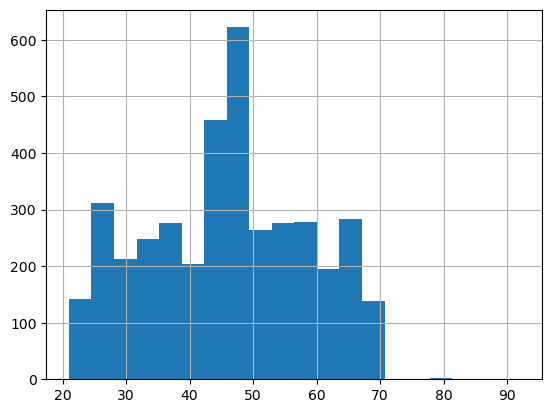

In [12]:
# Visualisez les données
import matplotlib.pyplot as plt
df_demographic['age'].hist(bins=20)
plt.show()

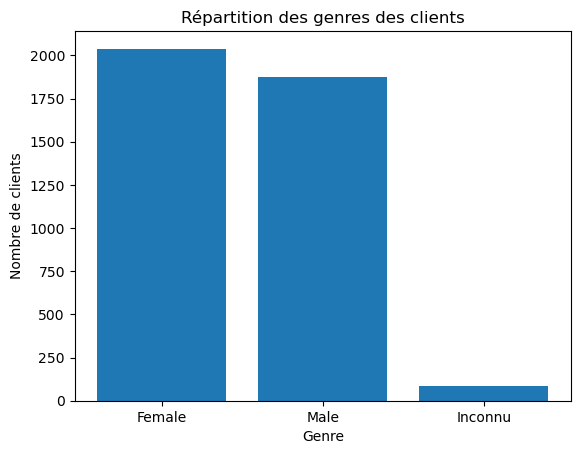

In [13]:
# Comptez le nombre de clients de chaque genre
gender_counts = df_demographic['gender'].value_counts()


# Créez un graphique à barres pour visualiser la répartition des genres
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Genre')
plt.ylabel('Nombre de clients')
plt.title('Répartition des genres des clients')
plt.show()